<a href="https://colab.research.google.com/github/alexandrepgui/CompGraf_IME/blob/main/CompGraf_GeoProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import seaborn as sns


sns.set_theme()
sns.set_context("paper")

PI = np.pi
PI

3.141592653589793

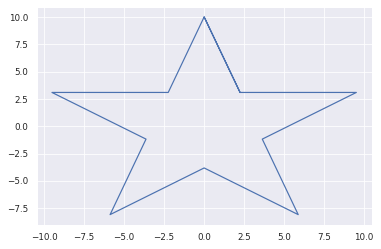

In [ ]:
def star(R, r=0):
    # regular pentagon, using sine law
    if r == 0:
        r = R * np.sin(PI/10) / np.sin(3*PI/10)
    
    k = np.arange(6)
    angles = k * 2*PI/5
    
    outer_x, outer_y = R * np.sin(angles), R * np.cos(angles)
    inner_x, inner_y = r * np.sin(angles+PI/5), r * np.cos(angles+PI/5)

    points_x = np.dstack((outer_x, inner_x)).flatten()
    points_y = np.dstack((outer_y, inner_y)).flatten()
    
    return np.vstack((points_x, points_y))

points = star(10)
plt.figure()
plt.plot(*points);

In [ ]:
def mirror(points, axis=1):
  if axis == 1:
    mat = np.array([[1, 0], [0, -1]])
  elif axis == 0:
    mat = np.array([[-1, 0], [0, 1]])
  return np.matmul(mat, points)

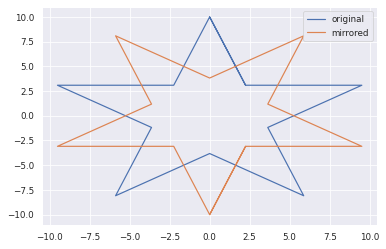

In [ ]:
plt.figure()
plt.plot(*points, label='original');
plt.plot(*mirror(points), label='mirrored');
plt.legend(loc='upper right');

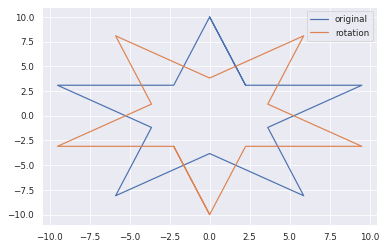

In [ ]:
def rotate(points, theta):
  rot = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
  return np.matmul(rot, points)

plt.figure()
plt.plot(*points, label='original')
plt.plot(*rotate(points, PI), label='rotation');
plt.legend(loc='upper right');

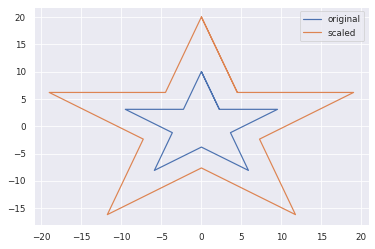

In [ ]:
def scale(points, scale):
  return points * scale


plt.figure()
plt.plot(*points, label='original');
plt.plot(*scale(points, 2), label='scaled');
plt.legend(loc='upper right');

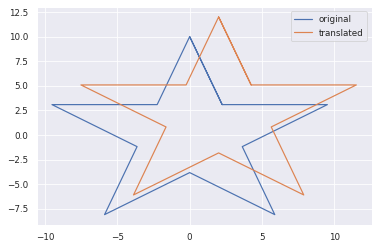

In [ ]:
def translate(points, v):
  return points + v.T


plt.figure()
plt.plot(*points, label='original')
plt.plot(*translate(points, np.array([2, 2]).reshape(1, -1)), label='translated')
plt.legend(loc='upper right');

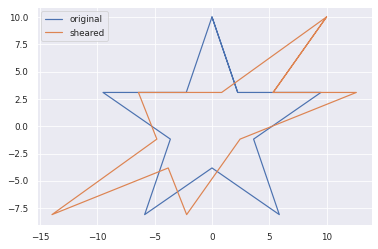

In [ ]:
def shear_x(points, lambd):
  mat = np.array([[1, lambd], [0, 1]])
  return np.matmul(mat, points)


plt.figure()
plt.plot(*points, label='original');
plt.plot(*shear_x(points, 1), label='sheared');
plt.legend(loc='upper left');

In [ ]:
def frame(center_x, R=10):
  center_y = 0
  theta = center_x / R
  points = star(R)
  points = rotate(points, theta)
  v = np.array([center_x, center_y]).reshape(1, -1)
  points = translate(points, v)
  return points

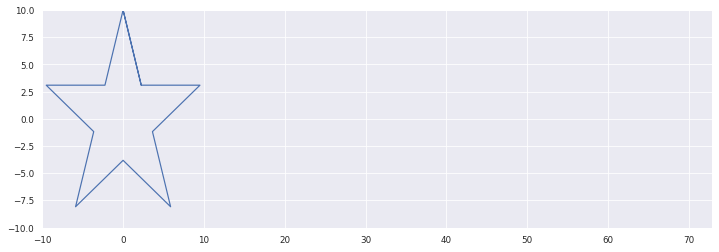

In [ ]:
R = 10
fig, ax = plt.subplots(figsize=(12, 4))
xdata, ydata = [], []
ln, = plt.plot([], [])

def frame(center_x, R=10):
  center_y = 0
  theta = center_x / R
  points = star(R)
  points = rotate(points, theta)
  v = np.array([center_x, center_y]).reshape(1, -1)
  points = translate(points, v)
  return points


def init():
  ax.set_xlim(-R, 2*PI*R + R)
  ax.set_ylim(-R, R)
  ln.set_data([], [])
  return ln,


def update(center_x):
  if center_x > 2 * PI * R:
    center_x = 4 * PI * R - center_x
  points = frame(center_x)
  xdata = points[0, :]
  ydata = points[1, :]
  ln.set_data(xdata, ydata)
  return ln,


ani = FuncAnimation(fig, update, frames=np.linspace(0, 4 * PI * R, 256),
                    init_func=init, blit=True)

ani.save('animation.mp4', fps=30)
plt.show()